In [1]:
import scipy.io as sio  
import matplotlib.pyplot as plt  
import numpy as np  
from PIL import Image

In [2]:
data=sio.loadmat('AR_buzhedang.mat')

In [3]:
data

{'O_Tr_DAT': array([[ 32, 180,  33, ...,  37,  51,  47],
        [ 31,  34,  30, ...,  38,  44,  48],
        [ 33,  34,  32, ...,  37,  41,  47],
        ..., 
        [255, 253, 254, ...,  36,  29,  50],
        [255, 253, 254, ...,  38,  30,  58],
        [255, 252, 253, ...,  38,  29,  66]], dtype=uint8),
 'O_Tt_DAT': array([[ 41,  79,  28, ...,  31,  46,  44],
        [ 28,  37,  29, ...,  31,  40,  41],
        [ 28,  29,  33, ...,  33,  37,  43],
        ..., 
        [255, 255, 255, ...,  26,  19,  25],
        [254, 254, 254, ...,  25,  19,  25],
        [254, 254, 254, ...,  22,  21,  27]], dtype=uint8),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jan 28 18:48:17 2018',
 '__version__': '1.0',
 'trls': array([[  1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,
           2,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,
           4,   4,   5,   5,   5,   5,   5,   5,   5,   6,   6,   6,   6,
          

In [90]:
grid = [[0]*57]*47
k=0
g=0
matrix_a = np.array(grid)
matrix_a = matrix_a.astype('float32')
for i in range(47):
    for j in range(57):
        matrix_a[i][j] = Tr_dataMatrix[5][k]/256
        k=k+1
matrix_a


array([[ 0.00086975,  0.00083923,  0.00086975, ...,  0.00389099,
         0.00389099,  0.00389099],
       [ 0.00083923,  0.00085449,  0.00082397, ...,  0.00389099,
         0.00389099,  0.00389099],
       [ 0.00086975,  0.0007782 ,  0.00079346, ...,  0.00389099,
         0.00389099,  0.00389099],
       ..., 
       [ 0.00064087,  0.00065613,  0.00057983, ...,  0.00354004,
         0.00323486,  0.00308228],
       [ 0.00071716,  0.0007019 ,  0.00062561, ...,  0.00389099,
         0.00389099,  0.00389099],
       [ 0.00088501,  0.00071716,  0.00067139, ...,  0.00389099,
         0.00387573,  0.00387573]], dtype=float32)

array([[ 0.16015625,  0.109375  ,  0.109375  , ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       [ 0.30859375,  0.14453125,  0.11328125, ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       [ 0.109375  ,  0.11328125,  0.12890625, ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       ..., 
       [ 0.12109375,  0.12109375,  0.12890625, ...,  0.1015625 ,
         0.09765625,  0.0859375 ],
       [ 0.1796875 ,  0.15625   ,  0.14453125, ...,  0.07421875,
         0.07421875,  0.08203125],
       [ 0.171875  ,  0.16015625,  0.16796875, ...,  0.09765625,
         0.09765625,  0.10546875]], dtype=float32)

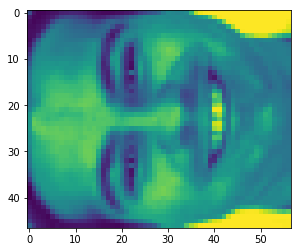

In [163]:
Tr_dataMatrix = data['O_Tt_DAT'].T.astype('float32')/256
Tr_sampleLabels = data['Tr_sampleLabels'].astype('float32')
bbb = Tr_dataMatrix[:][1]
'''
bbb.resize((47,57))
Tr_dataMatrix.shape
img1 = plt.imshow(bbb.T)
img1
'''
ddd = bbb.resize((47,57))
img1 = plt.imshow(bbb)
img1
Tr_dataMatrix

In [148]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy
from PIL import Image

#获取dataset
def load_data(dataset_path):
    img = Image.open(dataset_path)
    # 定义一个20 × 20的训练样本，一共有40个人，每个人都10张样本照片
    img_ndarray = np.asarray(img, dtype='float64') / 256
    #img_ndarray = np.asarray(img, dtype='float32') / 32

    # 记录脸数据矩阵，57 * 47为每张脸的像素矩阵
    faces = np.empty((400, 57 * 47))

    for row in range(20):
        for column in range(20):
            faces[20 * row + column] = np.ndarray.flatten(
                img_ndarray[row * 57: (row + 1) * 57, column * 47 : (column + 1) * 47]
            )

    label = np.zeros((400, 40))
    for i in range(40):
        label[i * 10: (i + 1) * 10, i] = 1

    # 将数据分成训练集，验证集，测试集
    train_data = np.empty((320, 57 * 47))
    train_label = np.zeros((320, 40))
    vaild_data = np.empty((40, 57 * 47))
    vaild_label = np.zeros((40, 40))
    test_data = np.empty((40, 57 * 47))
    test_label = np.zeros((40, 40))

    for i in range(40):
        train_data[i * 8: i * 8 + 8] = faces[i * 10: i * 10 + 8]
        train_label[i * 8: i * 8 + 8] = label[i * 10: i * 10 + 8]

        vaild_data[i] = faces[i * 10 + 8]
        vaild_label[i] = label[i * 10 + 8]

        test_data[i] = faces[i * 10 + 9]
        test_label[i] = label[i * 10 + 9]

    train_data = train_data.astype('float32')
    vaild_data = vaild_data.astype('float32')
    test_data = test_data.astype('float32')

    return [
        (train_data, train_label),
        (vaild_data, vaild_label),
        (test_data, test_label)
    ]

In [110]:
grid = [[0]*57]*47
k=0
g=0
matrix_a = np.array(grid)
matrix_a = matrix_a.astype('float32')
for i in range(57):
    for j in range(47):
        matrix_a[i][j] = bbb[k]
        k=k+1
matrix_a

ValueError: setting an array element with a sequence.

array([[ 0.1875    ,  0.17578125,  0.19140625, ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ],
       [ 0.234375  ,  0.2421875 ,  0.1875    , ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ],
       [ 0.15234375,  0.20703125,  0.23828125, ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ],
       ..., 
       [ 0.9609375 ,  0.48046875,  0.4921875 , ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ],
       [ 0.9609375 ,  0.50390625,  0.51953125, ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ],
       [ 0.9609375 ,  0.48828125,  0.484375  , ...,  0.9609375 ,
         0.9609375 ,  0.9609375 ]], dtype=float32)

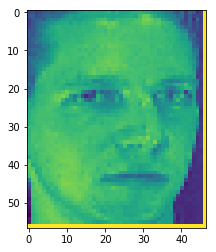

In [165]:
aaa=load_data('olivettifaces.gif')[0][0]

bbb = aaa[:][1]

bbb.resize((57,47))
aaa.shape
img1 = plt.imshow(bbb)
img1
aaa

In [166]:
ccc = load_data('olivettifaces.gif')[0][1]
ccc

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [183]:
ccc[319]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [344]:
def load_face():
    data=sio.loadmat('AR_buzhedang.mat')
    Tr_dataMatrix = data['O_Tt_DAT'].T.astype('float32')/256
    Tr_sampleLabels = data['trls'].astype('float32')
    Tt_dataMatrix = data['O_Tr_DAT'].astype('float32')/256
    #Tt_sampleLabels = data['try'].astype('float32')
    dat=Tr_dataMatrix
    dat2 = Tt_dataMatrix
    label = np.zeros((1400, 100))
    for i in range(100):
        label[i * 14: (i + 1) * 14, i] = 1
        
    faces = np.empty((1400, 57 * 47))
    
    ii=0
    for i in range(700):
        bbb = dat[:][i]
        grid = [[0]*57]*47
        bbb.resize((47,57))
        grid = bbb.T
        g2 = [[0]*2679]*1
        matrix_a = np.array(g2)
        matrix_a = matrix_a.astype('float32')
        g=0
        bbb2 = dat2[:][i]
        grid2 = [[0]*57]*47
        bbb2.resize((47,57))
        grid2 = bbb2.T
        g22 = [[0]*2679]*1
        matrix_a2 = np.array(g2)
        matrix_a2 = matrix_a.astype('float32')
        gg=0
        for j in range(57):
            for k in range(47):
                matrix_a[0][g]=grid[j][k]
                g=g+1
        faces[ii][:]= matrix_a
        ii = ii+1
        for j2 in range(57):
            for k2 in range(47):
                matrix_a[0][gg]=grid[j2][k2]
                gg=gg+1
        faces[ii][:]= matrix_a
        ii=ii+1
        
    #print faces.shape
        

    train_data = np.empty((500, 57 * 47))
    train_label = np.zeros((500, 100))
    vaild_data = np.empty((100, 57 * 47))
    vaild_label = np.zeros((100, 100))
    test_data = np.empty((100, 57 * 47))
    test_label = np.zeros((100, 100))

    for i in range(100):
        train_data[i * 5: i * 5 + 5] = faces[i * 7: i * 7 + 5]
        train_label[i * 5: i * 5 + 5] = label[i * 7: i * 7 + 5]

        vaild_data[i] = faces[i * 7 + 5]
        vaild_label[i] = label[i * 7 + 5]

        test_data[i] = faces[i * 7 + 6]
        test_label[i] = label[i * 7 + 6]

    train_data = train_data.astype('float32')
    vaild_data = vaild_data.astype('float32')
    test_data = test_data.astype('float32')

    return [
        (train_data, train_label),
        (vaild_data, vaild_label),
        (test_data, test_label)
    ]


In [345]:
a = load_face()[0][0]
bbb = a[:][4]

bbb.resize((57,47))
img1 = plt.imshow(bbb)
img1
aaa

ValueError: resize only works on single-segment arrays

In [300]:
aaa=load_face()[0][0]

bbb = aaa[:][1]
grid = [[0]*57]*47
bbb.resize((47,57))
grid = bbb.T
k=0
g2 = [[0]*2679]*1
matrix_a = np.array(g2)
matrix_a = matrix_a.astype('float32')
for i in range(57):
    for j in range(47):
        matrix_a[0][k]=grid[i][j]
        k=k+1
faces = np.empty((700, 57 * 47))
faces[0][:]= matrix_a

array([ 0.30859375,  0.171875  ,  0.13671875, ...,  0.99609375,
        0.9921875 ,  0.9921875 ])

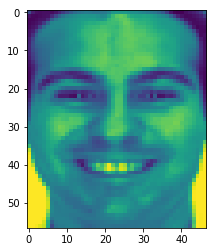

In [301]:
matrix_a.resize((57,47))
img1 = plt.imshow(matrix_a)
faces[0]

In [252]:
data=sio.loadmat('AR_buzhedang.mat')
for h in range(700):
    k=0
    g2 = [[0]*2679]*1
    matrix_a = np.array(g2)
    matrix_a = matrix_a.astype('float32')
    for i in range(57):
        for j in range(47):
            matrix_a[0][k]=grid[i][j]
            k=k+1
    

In [290]:
data=sio.loadmat('AR_buzhedang.mat')
bbb = Tr_dataMatrix

In [291]:
bbb

array([[ 0.16015625,  0.109375  ,  0.109375  , ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       [ 0.30859375,  0.14453125,  0.11328125, ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       [ 0.109375  ,  0.11328125,  0.12890625, ...,  0.99609375,
         0.9921875 ,  0.9921875 ],
       ..., 
       [ 0.12109375,  0.12109375,  0.12890625, ...,  0.1015625 ,
         0.09765625,  0.0859375 ],
       [ 0.1796875 ,  0.15625   ,  0.14453125, ...,  0.07421875,
         0.07421875,  0.08203125],
       [ 0.171875  ,  0.16015625,  0.16796875, ...,  0.09765625,
         0.09765625,  0.10546875]], dtype=float32)

In [293]:
bbb[:][0].shape

(2679,)

In [313]:
    faces = np.empty((700, 57 * 47))
    dat = Tr_dataMatrix
    for i in range(700):
        bbb = dat[:][i]
        grid = [[0]*57]*47
        bbb.resize((47,57))
        grid = bbb.T
        #print grid.shape
        #print grid
        g2 = [[0]*2679]*1
        matrix_a = np.array(g2)
        matrix_a = matrix_a.astype('float32')
        g=0
        for j in range(57):
            for k in range(47):
                matrix_a[0][g]=grid[j][k]
                g=g+1
        faces[i][:]= matrix_a
        
    print faces
        

[[ 0.16015625  0.12109375  0.12109375 ...,  0.8671875   0.99609375
   0.9921875 ]
 [ 0.30859375  0.171875    0.13671875 ...,  0.99609375  0.9921875
   0.9921875 ]
 [ 0.109375    0.109375    0.12109375 ...,  0.99609375  0.99609375
   0.9921875 ]
 ..., 
 [ 0.12109375  0.12109375  0.125      ...,  0.078125    0.09375     0.0859375 ]
 [ 0.1796875   0.14453125  0.14453125 ...,  0.1015625   0.09765625
   0.08203125]
 [ 0.171875    0.15625     0.15625    ...,  0.125       0.109375
   0.10546875]]


In [5]:
    data=sio.loadmat('AR_buzhedang.mat')
    Tr_dataMatrix = data['O_Tt_DAT'].T.astype('float32')/256
    Tr_sampleLabels = data['trls'].astype('float32')
    Tt_dataMatrix = data['O_Tr_DAT'].astype('float32')/256
    #Tt_sampleLabels = data['try'].astype('float32')
    dat=Tr_dataMatrix
    dat = Tt_dataMatrix
    label = np.zeros((1400, 100))
    for i in range(100):
        label[i * 14: (i + 1) * 14, i] = 1
        
    faces = np.empty((1400, 57 * 47))
    
    ii=0
    for i in range(700):
        bbb = dat[:][i]
        print bbb.shape
        grid = [[0]*57]*47
        bbb.resize((47,57))
        g2 = [[0]*2679]*1
        matrix_a = np.array(g2)
        matrix_a = matrix_a.astype('float32')
        g=0
        for j in range(57):
            for k in range(47):
                matrix_a[0][g]=grid[j][k]
                g=g+1
        faces[i*2][:]= matrix_a
        

(700,)


ValueError: resize only works on single-segment arrays

In [363]:
face = np.empty((1400, 57 * 47))
for i in range(700):
    ccc2 = dat2[:][i]
    print ccc2
    grid2 = [[0]*57]*47
    ccc2.resize((47,57))
    grid2 = ccc2.T
    g22 = [[0]*2679]*1
    matrix_a2 = np.array(g2)
    matrix_a2 = matrix_a.astype('float32')
    gg=0
    for j2 in range(57):
        for k2 in range(47):
            matrix_a[0][gg]=grid[j2][k2]
            gg=gg+1
    face[i*2+1][:]= matrix_a

[ 0.125       0.703125    0.12890625  0.9921875   0.90234375  0.95703125
  0.984375    0.1015625   0.12890625  0.109375    0.1953125   0.125
  0.16015625  0.2265625   0.1015625   0.109375    0.12109375  0.1171875
  0.13671875  0.140625    0.1796875   0.08984375  0.09765625  0.08984375
  0.08984375  0.10546875  0.1640625   0.203125    0.10546875  0.0859375
  0.0859375   0.11328125  0.1171875   0.16796875  0.17578125  0.08984375
  0.10546875  0.09375     0.10546875  0.109375    0.15234375  0.15234375
  0.25390625  0.11328125  0.12890625  0.0859375   0.09765625  0.1171875
  0.12890625  0.09375     0.1015625   0.08984375  0.08984375  0.1171875
  0.1171875   0.13671875  0.14453125  0.1484375   0.14453125  0.140625
  0.16796875  0.23046875  0.23828125  0.7890625   0.19921875  0.1328125
  0.1640625   0.1953125   0.390625    0.41015625  0.13671875  0.125
  0.1171875   0.12109375  0.12109375  0.33203125  0.3359375   0.09765625
  0.09765625  0.09765625  0.09375     0.1171875   0.1953125   0.2460

ValueError: resize only works on single-segment arrays

In [359]:
ccc2 = dat2[:][1]
ccc2.shape

(700,)